# **Global Methane Flux Analysis**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"<br />

Kaggle dataset called "Methane Emissions" was used as raw data and saved under the raw folder. [here]( https://www.kaggle.com/datasets/ashishraut64/global-methane-emissions) is the link to the Kaggle website.

## Inputs

* Write down which data or information you need to run the notebook <br />


## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/Users/danielledelouw/Documents/code_institute/vscode-projects/Global_Methane_Flux_Analysis/Global_Methane_Flux_Analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/Users/danielledelouw/Documents/code_institute/vscode-projects/Global_Methane_Flux_Analysis/Global_Methane_Flux_Analysis'

# Section 1

Section 1 Extraction:
Load the Dataset

In [8]:
import pandas as pd

df = pd.read_csv('Dataset/raw/Methane_final.csv')
df

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
...,...,...,...,...,...,...,...,...,...
1543,1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1544,1544,World,World,30296.500000,Energy,Steam coal,All,2022,Not available
1545,1545,World,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1546,1546,World,World,9737.874023,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


Check the Shape of dataset:

In [11]:
df.shape

(1548, 9)

Check Information of dataset:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1548 non-null   int64  
 1   region      1548 non-null   object 
 2   country     1548 non-null   object 
 3   emissions   1548 non-null   float64
 4   type        1548 non-null   object 
 5   segment     1548 non-null   object 
 6   reason      1548 non-null   object 
 7   baseYear    1548 non-null   object 
 8   notes       1548 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 109.0+ KB


Statistical info of column "Emissions" info:

In [23]:
import numpy as np
df.describe(include=[np.number])

,Unnamed: 0,emissions
count,1548.000000,1548.000000
mean,773.500000,643.255972
std,447.013423,5566.238201
min,0.000000,0.000459
25%,386.750000,2.659361
50%,773.500000,24.064669
75%,1160.250000,128.419594
max,1547.000000,141953.765625


Easy plot of data spread on column emissions:


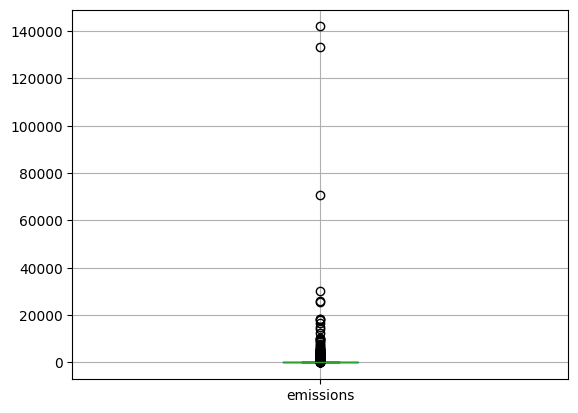

In [24]:
emissions_boxplot = df.boxplot(column=['emissions']) 

Check rows of decending "emission" values

In [ ]:
df_sorted_emissions = df.sort_values(by='emissions', ascending=True) #sorting emissions values ascending
df_sorted_emissions.head(10)

,region,country,emissions,type,segment,reason,baseYear
1416,Other,Other,0.000459,Energy,Offshore oil,Flared,2022
978,Europe,Netherlands,0.001081,Energy,Onshore oil,Flared,2022
973,Europe,Netherlands,0.001164,Energy,Offshore oil,Flared,2022
246,Africa,Morocco,0.001264,Energy,Onshore oil,Fugitive,2022
1417,Other,Other,0.001951,Energy,Offshore oil,Fugitive,2022
974,Europe,Netherlands,0.003179,Energy,Offshore oil,Fugitive,2022
1106,Europe,Slovenia,0.003344,Energy,Onshore gas,Fugitive,2022
979,Europe,Netherlands,0.003596,Energy,Onshore oil,Fugitive,2022
283,Africa,Niger,0.004000,Energy,Other from coal,All,2022
9,Africa,Algeria,0.004000,Energy,Other from coal,All,2022


In [ ]:
df['segment'].value_counts() # investigating "total" column

segment
Total                                             414
Onshore oil                                       217
Gas pipelines and LNG facilities                  164
Offshore oil                                      159
Onshore gas                                       144
Offshore gas                                      118
Other from oil and gas                             98
Bioenergy                                          93
Other from coal                                    66
Steam coal                                         30
Coking coal                                        24
Satellite-detected large oil and gas emissions     21
Name: count, dtype: int64

In [ ]:
df_China=df[df['country']=='China'] #checking values for China and saving china in a separate df


Check for missing values:

In [ ]:
df.isnull().sum() # the output reveals that there are no missing values

Unnamed: 0    0
region        0
country       0
emissions     0
type          0
segment       0
reason        0
baseYear      0
notes         0
dtype: int64

Check for duplicates:

In [ ]:
df.duplicated().sum()
#no duplicated data in rows

0

Check for unique values:

In [ ]:
df.nunique()

Unnamed: 0    1548
region           9
country        105
emissions     1531
type             4
segment         12
reason           4
baseYear         2
notes            3
dtype: int64

Check the contents of a few columns:


In [104]:
contents_of_columns = ['region','type','segment','reason','baseYear','notes'] #country'
for col in contents_of_columns:
    print(f"\n{col} ({df[col].nunique()} unique values):")
    print(df[col].unique())

    #comments:

    #"region" consists of continents and 1 general value called "World" and "Other"
    #"country" returned 105 countries, 193 countries in the world so there is a desprepency. 
    # "country" There are 4 variables that are not a country  'Other countries in Europe' 'Other EU17 countries'
     #'Other EU7 countries' and 'World'.
    #"types" consists of group name origin of methane emission, stand out is "other"
    #"segment" consists of specific origins of methan emissions,"Total" is misleading as it could be the company or the sum of a group
    #'coking coal' also known as metallurgical coal, is a type of coal used to produce coke, a key ingredient in the steelmaking process
    #"reason" consists of unintended releases of gas, 'fugitive' is uncontrolled and 'venting' & 'flared' is controlled and 'all' is a mix
    #"baseyear" displays two variables, can be used as categorical data types, need to convert from object to category
    #"notes" is a reference to UN Framework or Greenhouse Gas Data Interface with link. Good to drop column
    #9th column not listed is "Unnamed: 0" is an internal index, we have an index so this will be dropped


region (8 unique values):
['Africa' 'Asia Pacific' 'Central and South America' 'Europe'
 'Middle East' 'North America' 'Other' 'Russia & Caspian']

type (3 unique values):
['Agriculture' 'Energy' 'Waste']

segment (12 unique values):
['Total' 'Bioenergy' 'Gas pipelines and LNG facilities' 'Onshore gas'
 'Onshore oil' 'Other from coal' 'Other from oil and gas'
 'Satellite-detected large oil and gas emissions' 'Offshore oil'
 'Offshore gas' 'Coking coal' 'Steam coal']

reason (4 unique values):
['All' 'Fugitive' 'Vented' 'Flared']

baseYear (2 unique values):
['2019-2021' '2022']


KeyError: 'notes'

Drop columns: "Notes" and "Unnamed: 0"

In [ ]:
df=df.drop(['notes', 'Unnamed: 0'], axis=1)


KeyError: "['notes', 'Unnamed: 0'] not found in axis"

In [ ]:
df.head(5)#check if all was removed

,region,country,emissions,type,segment,reason,baseYear
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022


Remove last 5 values called "world" with sum total of emissions

In [48]:
df.sort_values(by='emissions', ascending=False).head(7)


,region,country,emissions,type,segment,reason,baseYear
1526,World,World,141953.765625,Agriculture,Total,All,2019-2021
1545,World,World,133350.984375,Energy,Total,All,2022
1547,World,World,70758.710938,Waste,Total,All,2019-2021
1544,World,World,30296.500000,Energy,Steam coal,All,2022
1540,World,World,25941.500000,Energy,Onshore oil,Vented,2022
478,Asia Pacific,China,25372.222656,Energy,Total,All,2022
460,Asia Pacific,China,18501.914062,Agriculture,Total,All,2019-2021


In [ ]:
df = df.drop(index=[1526, 1545, 1547, 1544,1540]) #dropped last 5 highest values where region=world and country=world and segment=total


In [132]:
df.sort_values(by='emissions', ascending=False).head(20) #check output

,region,country,emissions,type,segment,reason,baseYear
478,Asia Pacific,China,25372.222656,Energy,Total,All,2022
460,Asia Pacific,China,18501.914062,Agriculture,Total,All,2019-2021
481,Asia Pacific,India,18358.517578,Agriculture,Total,All,2019-2021
1489,Russia & Caspian,Russia,18078.083984,Energy,Total,All,2022
1406,North America,United States,16769.630859,Energy,Total,All,2022
477,Asia Pacific,China,14809.000000,Energy,Steam coal,All,2022
710,Central and South America,Brazil,14020.088867,Agriculture,Total,All,2019-2021
480,Asia Pacific,China,10424.141602,Waste,Total,All,2019-2021
1387,North America,United States,9409.325195,Agriculture,Total,All,2019-2021
884,Europe,European Union,8851.337891,Agriculture,Total,All,2019-2021


In [53]:
emissions_boxplot_ = df.boxplot(column=['emissions']) 

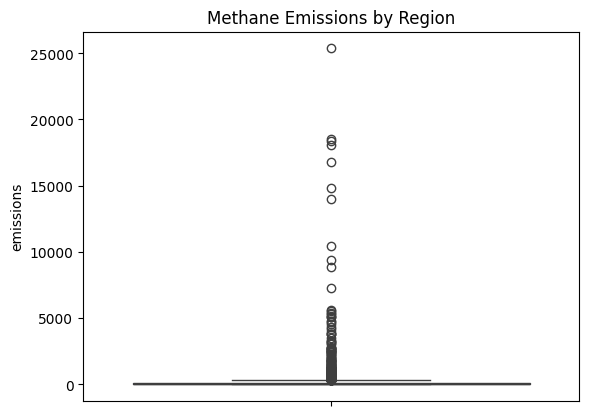

In [97]:
import seaborn as sns #check data spread after removing 5 highest emission values
import matplotlib.pyplot as plt

sns.boxplot(y=df['emissions'])
plt.title("Methane Emissions by Region")
plt.show()

In [59]:
df

,region,country,emissions,type,segment,reason,baseYear
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022
...,...,...,...,...,...,...,...
1539,World,World,1914.770020,Energy,Onshore oil,Fugitive,2022
1541,World,World,1518.482056,Energy,Other from coal,All,2022
1542,World,World,2292.331787,Energy,Other from oil and gas,All,2022
1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022


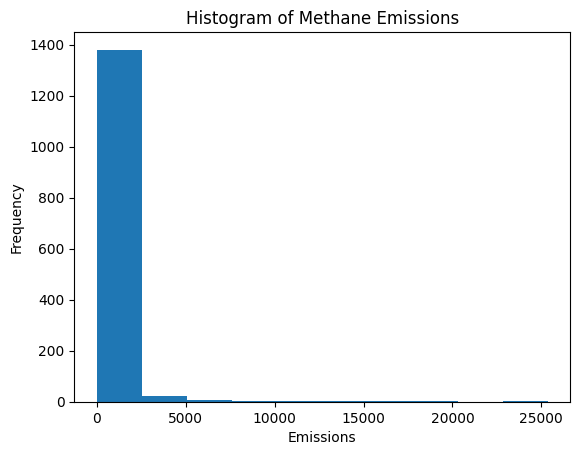

In [94]:
df['emissions'].plot(kind='hist')
plt.title("Histogram of Methane Emissions")
plt.xlabel("Emissions")
plt.ylabel("Frequency")
plt.show() #most of the data lies at the start

In [91]:
df_high_emissions = df[df['emissions'] > 5000] #check for emissions above 5000
print(df_high_emissions)

                         region         country     emissions         type  \
460                Asia Pacific           China  18501.914062  Agriculture   
462                Asia Pacific           China   5418.770020       Energy   
477                Asia Pacific           China  14809.000000       Energy   
478                Asia Pacific           China  25372.222656       Energy   
480                Asia Pacific           China  10424.141602        Waste   
481                Asia Pacific           India  18358.517578  Agriculture   
500                Asia Pacific           India   5185.236328       Energy   
502                Asia Pacific           India   5551.760742        Waste   
521                Asia Pacific       Indonesia   5080.369141       Energy   
618                Asia Pacific        Pakistan   5319.456055  Agriculture   
710   Central and South America          Brazil  14020.088867  Agriculture   
884                      Europe  European Union   8851.337891  A

In [ ]:
df[df['region'] == 'World'] # where region= "world" needs to be dropped

,region,country,emissions,type,segment,reason,baseYear
1527,World,World,9208.040039,Energy,Bioenergy,All,2022
1528,World,World,10009.900391,Energy,Coking coal,All,2022
1529,World,World,7801.729980,Energy,Gas pipelines and LNG facilities,Fugitive,2022
1530,World,World,4159.890137,Energy,Gas pipelines and LNG facilities,Vented,2022
1531,World,World,1370.260010,Energy,Offshore gas,Fugitive,2022
1532,World,World,2973.179932,Energy,Offshore gas,Vented,2022
1533,World,World,1320.390015,Energy,Offshore oil,Flared,2022
1534,World,World,488.638000,Energy,Offshore oil,Fugitive,2022
1535,World,World,6620.109863,Energy,Offshore oil,Vented,2022
1536,World,World,5665.069824,Energy,Onshore gas,Fugitive,2022


---

In [ ]:
df = df.drop(df[df['region'] == 'World'].index) #all rows dropped

In [ ]:
df[df['region'] == 'World'] # check

,region,country,emissions,type,segment,reason,baseYear


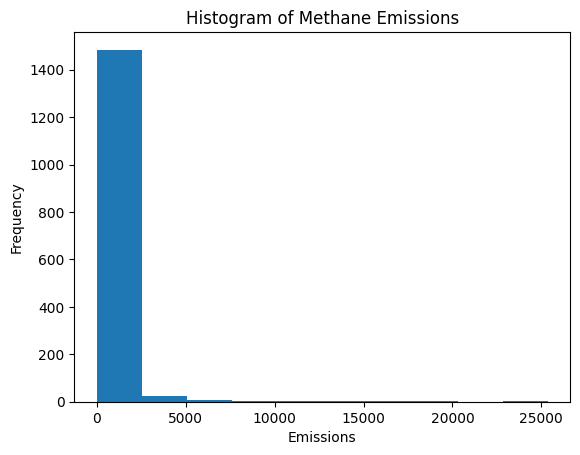

In [ ]:
df['emissions'].plot(kind='hist')
plt.title("Histogram of Methane Emissions")
plt.xlabel("Emissions")
plt.ylabel("Frequency")
plt.show() #most of the data lies at the start, it is an asymmetrical shape

In [72]:
df.sort_values(by='emissions', ascending=False).head(30)

,region,country,emissions,type,segment,reason,baseYear
478,Asia Pacific,China,25372.222656,Energy,Total,All,2022
460,Asia Pacific,China,18501.914062,Agriculture,Total,All,2019-2021
481,Asia Pacific,India,18358.517578,Agriculture,Total,All,2019-2021
1489,Russia & Caspian,Russia,18078.083984,Energy,Total,All,2022
1406,North America,United States,16769.630859,Energy,Total,All,2022
477,Asia Pacific,China,14809.000000,Energy,Steam coal,All,2022
710,Central and South America,Brazil,14020.088867,Agriculture,Total,All,2019-2021
480,Asia Pacific,China,10424.141602,Waste,Total,All,2019-2021
1387,North America,United States,9409.325195,Agriculture,Total,All,2019-2021
884,Europe,European Union,8851.337891,Agriculture,Total,All,2019-2021


How to handle "total" value per country?


In [87]:
df[(df['segment'] == 'Total') & (df['type'] == 'Other')]

,region,country,emissions,type,segment,reason,baseYear
13,Africa,Algeria,6.475721,Other,Total,All,2019-2021
29,Africa,Angola,81.709923,Other,Total,All,2019-2021
38,Africa,Benin,43.247742,Other,Total,All,2019-2021
47,Africa,Botswana,2.236912,Other,Total,All,2019-2021
62,Africa,Cameroon,23.942757,Other,Total,All,2019-2021
...,...,...,...,...,...,...,...
1446,Russia & Caspian,Azerbaijan,0.960435,Other,Total,All,2019-2021
1468,Russia & Caspian,Kazakhstan,17.407061,Other,Total,All,2019-2021
1490,Russia & Caspian,Russia,323.421631,Other,Total,All,2019-2021
1509,Russia & Caspian,Turkmenistan,1.414801,Other,Total,All,2019-2021


In [89]:
df = df.drop(df[(df['segment'] == 'Total') & (df['type'] == 'Other')].index) #dropped type='Other'

In [ ]:
df[(df['segment'] == 'Total') & (df['type'] == 'Other')] #check

,region,country,emissions,type,segment,reason,baseYear


In [ ]:
top_5_total = (
    df[df['segment'] == 'Total']
    .sort_values(by='emissions', ascending=False)
    .head(5)
)
print(top_5_total) #displays to top 5 countries with type=total

                region        country     emissions         type segment  \
478       Asia Pacific          China  25372.222656       Energy   Total   
460       Asia Pacific          China  18501.914062  Agriculture   Total   
481       Asia Pacific          India  18358.517578  Agriculture   Total   
1489  Russia & Caspian         Russia  18078.083984       Energy   Total   
1406     North America  United States  16769.630859       Energy   Total   

     reason   baseYear  
478     All       2022  
460     All  2019-2021  
481     All  2019-2021  
1489    All       2022  
1406    All       2022  


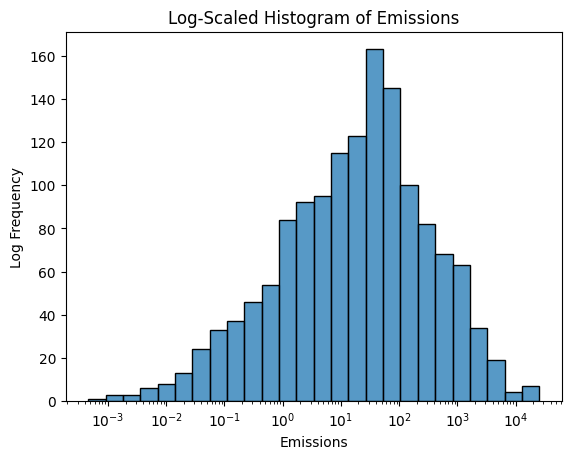

In [102]:
sns.histplot(df['emissions'], log_scale=True)
plt.title("Log-Scaled Histogram of Emissions")
plt.xlabel("Emissions")
plt.ylabel("Log Frequency")
plt.show()

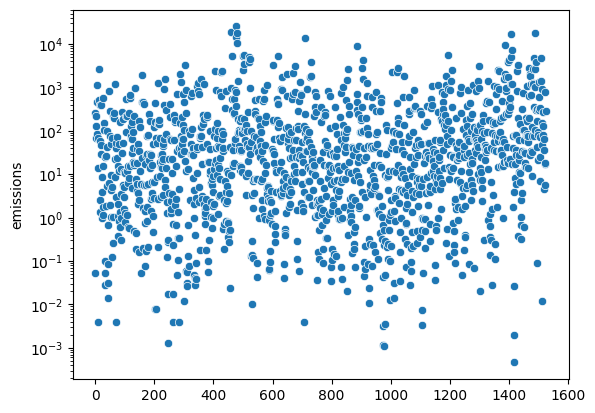

In [130]:
# Create scatterplot
sns.scatterplot(df['emissions'])

# Set log scale
#plt.xscale('log')
plt.yscale('log')

plt.show()

In [ ]:
df[df['country']=='Morocco'] # it is important to note here that some of the columns where segment = total, are the sum of the same "type" for example Type=Energy, however it is not for all

,region,country,emissions,type,segment,reason,baseYear
240,Africa,Morocco,295.379517,Agriculture,Total,All,2019-2021
241,Africa,Morocco,14.228000,Energy,Bioenergy,All,2022
242,Africa,Morocco,2.335920,Energy,Gas pipelines and LNG facilities,Fugitive,2022
243,Africa,Morocco,1.245510,Energy,Gas pipelines and LNG facilities,Vented,2022
244,Africa,Morocco,0.123582,Energy,Onshore gas,Fugitive,2022
245,Africa,Morocco,0.268148,Energy,Onshore gas,Vented,2022
246,Africa,Morocco,0.001264,Energy,Onshore oil,Fugitive,2022
247,Africa,Morocco,0.017119,Energy,Onshore oil,Vented,2022
248,Africa,Morocco,0.300000,Energy,Other from coal,All,2022
249,Africa,Morocco,3.661930,Energy,Other from oil and gas,All,2022


# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
